In [1]:
!pip install torch==1.7.0+cu101 torchvision==0.8.1+cu101 torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import IPython.display as ipd
from tqdm.notebook import tqdm

import librosa

print(f'Can I can use GPU now? -- {torch.cuda.is_available()}')

#!sudo apt-get install sox libsox-dev libsox-fmt-all
#!pip install torchaudio -f https://download.pytorch.org/whl/torch_stable.html
#!pip install torch

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.3 MB 19 kB/s 
     |████████████████████████████████| 12.7 MB 39.5 MB/s 
     |████████████████████████████████| 7.6 MB 3.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.0+cu101 which is incompatible.


/usr/local/lib/python3.7/dist-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


Can I can use GPU now? -- True


In [2]:
device = torch.device('cuda')

#!rm -rf /genres
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/Project/genres.tar.gz /.
all_dataset = torchaudio.datasets.GTZAN('/', download=True)
#!cp /genres.tar.gz /content/drive/MyDrive/Project/.

#train_dataset = torchaudio.datasets.GTZAN('/', download=True, subset="training")
#test_dataset = torchaudio.datasets.GTZAN('/', download=True, subset="testing")

labels = ['hiphop', 'metal', 'pop', 'rock', 'reggae', 'jazz', 'disco', 'country', 'classical', 'blues']
wav = []
genre = []
for (waveform, sample_rate, label) in all_dataset:
  wav.append(waveform)
  genre.append(label)

wav_train, wav_test, genre_train, genre_test = train_test_split(wav, genre, test_size=300, random_state=42, stratify=genre)

exp3_set = {'hiphop':0, 'metal':1, 'pop':2, 'rock':3, 'reggae':4, 'jazz':5, 'disco':6, 'country':7, 'classical':8, 'blues':9}
exp3_inputs = []
exp3_labels = []
exp3_inputs_test = []
exp3_labels_test = []
exp1_set = {'classical':0, 'jazz':1, 'reggae':2, 'pop':3, 'hiphop':4, 'metal':5}
exp1_inputs = []
exp1_labels = []
exp1_inputs_test = []
exp1_labels_test = []
set1 = {'hiphop':0, 'metal':0, 'pop':0, 'rock':0, 'reggae':0, 'jazz':1, 'disco':1, 'country':1, 'classical':1, 'blues':1}
set1_inputs = []
set1_labels =[]
set1_inputs_test = []
set1_labels_test =[]
set2a = {'hiphop':0, 'metal':0, 'rock':0, 'pop':1, 'reggae':1}
set2a_inputs = []
set2a_labels =[]
set2a_inputs_test = []
set2a_labels_test =[]
set2b = {'disco':0, 'country':0, 'jazz':1, 'classical':1, 'blues':1}
set2b_inputs = []
set2b_labels =[]
set2b_inputs_test = []
set2b_labels_test =[]
set3a = {'hiphop':0, 'metal':1, 'rock':2}
set3a_inputs = []
set3a_labels =[]
set3a_inputs_test = []
set3a_labels_test =[]
set3b = {'pop':0, 'reggae':1}
set3b_inputs = []
set3b_labels =[]
set3b_inputs_test = []
set3b_labels_test =[]
set3c = {'disco':0, 'country':1}
set3c_inputs = []
set3c_labels =[]
set3c_inputs_test = []
set3c_labels_test =[]
set3d = {'jazz':0, 'classical':1, 'blues':2}
set3d_inputs = []
set3d_labels =[]
set3d_inputs_test = []
set3d_labels_test =[]

for (waveform, label) in zip(wav_train, genre_train):
  
  mfcc14 = librosa.feature.mfcc(waveform[0].detach().numpy().flatten(),sr = 22050, n_mfcc=14, hop_length=512)
  mfcc14 = mfcc14[:,0:1290]
  mfcc14 = np.reshape(mfcc14,(1290,14))

  if label in exp1_set:
    mfcc13 = librosa.feature.mfcc(waveform[0].detach().numpy().flatten(),sr = 22050, n_mfcc=13, hop_length=512)
    mfcc13 = mfcc13[:,0:1290]
    mfcc13 = np.reshape(mfcc13,(1290,13))
    exp1_inputs.append(mfcc13)
    exp1_labels.append(exp1_set[label])
  
  if label in set1:
    set1_inputs.append(mfcc14)
    set1_labels.append(set1[label])
  if label in set2a:
    set2a_inputs.append(mfcc14)
    set2a_labels.append(set2a[label])
  if label in set2b:
    set2b_inputs.append(mfcc14)
    set2b_labels.append(set2b[label])
  if label in set3a:
    set3a_inputs.append(mfcc14)
    set3a_labels.append(set3a[label])
  if label in set3b:
    set3b_inputs.append(mfcc14)
    set3b_labels.append(set3b[label])
  if label in set3c:
    set3c_inputs.append(mfcc14)
    set3c_labels.append(set3c[label])
  if label in set3d:
    set3d_inputs.append(mfcc14)
    set3d_labels.append(set3d[label])
  exp3_inputs.append(mfcc14)
  exp3_labels.append(exp3_set[label])

for (waveform, label) in zip(wav_test, genre_test):
  
  mfcc14 = librosa.feature.mfcc(waveform[0].detach().numpy().flatten(),sr = 22050, n_mfcc=14, hop_length=512)
  mfcc14 = mfcc14[:,0:1290]
  mfcc14 = np.reshape(mfcc14,(1290,14))

  if label in exp1_set:
    mfcc13 = librosa.feature.mfcc(waveform[0].detach().numpy().flatten(),sr = 22050, n_mfcc=13, hop_length=512)
    mfcc13 = mfcc13[:,0:1290]
    mfcc13 = np.reshape(mfcc13,(1290,13))
    exp1_inputs_test.append(mfcc13)
    exp1_labels_test.append(exp1_set[label])
  
  if label in set1:
    set1_inputs_test.append(mfcc14)
    set1_labels_test.append(set1[label])
  if label in set2a:
    set2a_inputs_test.append(mfcc14)
    set2a_labels_test.append(set2a[label])
  if label in set2b:
    set2b_inputs_test.append(mfcc14)
    set2b_labels_test.append(set2b[label])
  if label in set3a:
    set3a_inputs_test.append(mfcc14)
    set3a_labels_test.append(set3a[label])
  if label in set3b:
    set3b_inputs_test.append(mfcc14)
    set3b_labels_test.append(set3b[label])
  if label in set3c:
    set3c_inputs_test.append(mfcc14)
    set3c_labels_test.append(set3c[label])
  if label in set3d:
    set3d_inputs_test.append(mfcc14)
    set3d_labels_test.append(set3d[label])
  exp3_inputs_test.append(mfcc14)
  exp3_labels_test.append(exp3_set[label])

exp1_inputs = torch.tensor(exp1_inputs)
exp1_labels = torch.tensor(exp1_labels)
exp3_inputs = torch.tensor(exp3_inputs)
exp3_labels = torch.tensor(exp3_labels)
set1_inputs = torch.tensor(set1_inputs)
set1_labels = torch.tensor(set1_labels)
set2a_inputs = torch.tensor(set2a_inputs)
set2a_labels = torch.tensor(set2a_labels)
set2b_inputs = torch.tensor(set2b_inputs)
set2b_labels = torch.tensor(set2b_labels)
set3a_inputs = torch.tensor(set3a_inputs)
set3a_labels = torch.tensor(set3a_labels)
set3b_inputs = torch.tensor(set3b_inputs)
set3b_labels = torch.tensor(set3b_labels)
set3c_inputs = torch.tensor(set3c_inputs)
set3c_labels = torch.tensor(set3c_labels)
set3d_inputs = torch.tensor(set3d_inputs)
set3d_labels = torch.tensor(set3d_labels)

exp1_inputs_test = torch.tensor(exp1_inputs_test)
exp1_labels_test = torch.tensor(exp1_labels_test)
exp3_inputs_test = torch.tensor(exp3_inputs_test)
exp3_labels_test = torch.tensor(exp3_labels_test)
set1_inputs_test = torch.tensor(set1_inputs_test)
set1_labels_test = torch.tensor(set1_labels_test)
set2a_inputs_test = torch.tensor(set2a_inputs_test)
set2a_labels_test = torch.tensor(set2a_labels_test)
set2b_inputs_test = torch.tensor(set2b_inputs_test)
set2b_labels_test = torch.tensor(set2b_labels_test)
set3a_inputs_test = torch.tensor(set3a_inputs_test)
set3a_labels_test = torch.tensor(set3a_labels_test)
set3b_inputs_test = torch.tensor(set3b_inputs_test)
set3b_labels_test = torch.tensor(set3b_labels_test)
set3c_inputs_test = torch.tensor(set3c_inputs_test)
set3c_labels_test = torch.tensor(set3c_labels_test)
set3d_inputs_test = torch.tensor(set3d_inputs_test)
set3d_labels_test = torch.tensor(set3d_labels_test)

print(set1_inputs.shape)
print(set2a_inputs.shape)
print(set2b_inputs.shape)
print(set3a_inputs.shape)
print(set3b_inputs.shape)
print(set3c_inputs.shape)
print(set3d_inputs.shape)


Mounted at /content/drive
torch.Size([700, 1290, 14])
torch.Size([350, 1290, 14])
torch.Size([350, 1290, 14])
torch.Size([210, 1290, 14])
torch.Size([140, 1290, 14])
torch.Size([140, 1290, 14])
torch.Size([210, 1290, 14])


## Exercise 1: Why use a CNN rather than only fully connected layers? (30 points)

In this exercise, you will build two models for the **MNIST** dataset: one uses only fully connected layers and another uses a standard CNN layout (convolution layers everywhere except the last layer is fully connected layer). The two models should be built with roughly the same accuracy performance, your task is to compare the number of network parameters (a huge number of parameters can affect training/testing time, memory requirements, overfitting, etc.).

### Task 1: Following the structure used in the instructions, you should create

*   One network named **OurFC** which should consist with only fully connected layers

  *   You should decide how many layers and how many hidden dimensions you want in your network 
  *   Your final accuracy on the test dataset should lie roughly around 90% ($\pm$2%)
  *   There is no need to make the neural network unnecessarily complex, your total training time should no longer than 3 mins

*   Another network named **OurCNN** which applys a standard CNN structure
  *   Again, you should decide how many layers and how many channels you want for each layer.
  *   Your final accuracy on the test dataset should lie roughly around 90% ($\pm$2%)
  *   A standard CNN structure can be composed as **[Conv2d, MaxPooling, ReLU] x num_conv_layers + FC x num_fc_layers**

* Train and test your network on MNIST data as in the instructions
* You are **required** to print out the loss in the training and loss+accuracy in the test as in the instructions

In [3]:
class lstm(nn.Module): 

  def __init__(self, mfcc_num, output_size):
    super(lstm, self).__init__()

    self.output_size = output_size
    self.lstm1= torch.nn.LSTM(mfcc_num, 128, batch_first=True)
    self.lstm2= torch.nn.LSTM(128, 32, batch_first=True)
    self.fc = nn.Linear(32,output_size)

  def forward(self, x):
    #print(x.shape)
    out1, (hn, cn) = self.lstm1(x)
    #print(out1.shape)
    out2, (hn, cn) = self.lstm2(out1)
    #print(out2.shape)
    x = self.fc(out2[:,-1])
    #print(x.shape)
    return F.log_softmax(x,-1) 

class lstm2(nn.Module): 

  def __init__(self, mfcc_num, output_size):
    super(lstm2, self).__init__()

    self.lstm1= torch.nn.LSTM(mfcc_num, 128, batch_first=True)
    self.fc = nn.Linear(128,output_size)

  def forward(self, x):
    #print(x.shape)
    out1, (hn, cn) = self.lstm1(x)
    #print(out1.shape)
    x = F.relu(self.fc(out1[:,-1]))
    #print(x.shape)
    return F.log_softmax(x,-1) 

In [4]:
def train(classifier, epoch, inputs, labels, batch_size, optimizer):

  classifier.train() # we need to set the mode for our model

  num_batches = int(inputs.shape[0]/batch_size)

  for i in range(num_batches):

    mfcc = inputs[i*batch_size: (i+1)*batch_size,:,:]
    targets = labels[i*batch_size:(i+1)*batch_size]

    mfcc = mfcc.to(device)
    targets = targets.to(device)
    optimizer.zero_grad()
    output = classifier(mfcc)
    #print(output.shape)
    #print(targets.shape)
    loss = F.nll_loss(output, targets) 
    loss.backward()
    optimizer.step()

    if i % 2 == 0: # We record our output every 2 batches
      train_losses.append(loss.item()) # item() is to get the value of the tensor directly
      train_counter.append(
        (i*35) + ((epoch-1)*len(inputs)))
    if i % 4 == 0: # We visulize our output every 4 batches
      print(f'Epoch {epoch}: [{i*len(mfcc)}/{len(inputs)}] Loss: {loss.item()}')

def test(classifier, epoch, inputs, labels, batch_size):

  classifier.eval() # we need to set the mode for our model

  test_loss = 0
  correct = 0
  num_batches = int(inputs.shape[0]/batch_size)

  with torch.no_grad():
    for i in range(num_batches):
      mfcc = inputs[i*batch_size: (i+1)*batch_size,:,:]
      targets = labels[i*batch_size:(i+1)*batch_size]

      mfcc = mfcc.to(device)
      targets = targets.to(device)
      output = classifier(mfcc)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
      correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples
  
  test_loss /= len(inputs)
  test_losses.append(test_loss)
  test_counter.append(len(inputs)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(inputs)}%')

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 100
batch_size_train, batch_size_test = 35, 30
LSTM_EXP1 = lstm(13, 6)

LSTM_EXP1 = LSTM_EXP1.to(device)
optimizer = optim.Adam(LSTM_EXP1.parameters(), lr=0.001)
#optimizer = optim.SGD(LSTM1.parameters(), lr=0.01, momentum=0.8)
for epoch in range(1, 20+1):
  train(LSTM_EXP1, epoch, exp1_inputs, exp1_labels, batch_size_train, optimizer)
  test(LSTM_EXP1, epoch, exp1_inputs_test, exp1_labels_test, batch_size_test)

Epoch 1: [0/420] Loss: 1.8004522323608398
Epoch 1: [140/420] Loss: 1.744498610496521
Epoch 1: [280/420] Loss: 1.7379032373428345
Test result on epoch 1: Avg loss is 1.703748024834527, Accuracy: 26.666667938232422%
Epoch 2: [0/420] Loss: 1.6488593816757202
Epoch 2: [140/420] Loss: 1.6476022005081177
Epoch 2: [280/420] Loss: 1.6230098009109497
Test result on epoch 2: Avg loss is 1.6396610895792643, Accuracy: 33.333335876464844%
Epoch 3: [0/420] Loss: 1.5472984313964844
Epoch 3: [140/420] Loss: 1.536816120147705
Epoch 3: [280/420] Loss: 1.5105679035186768
Test result on epoch 3: Avg loss is 1.5866108152601455, Accuracy: 35.55555725097656%
Epoch 4: [0/420] Loss: 1.464467167854309
Epoch 4: [140/420] Loss: 1.44107186794281
Epoch 4: [280/420] Loss: 1.4131779670715332
Test result on epoch 4: Avg loss is 1.5188250435723198, Accuracy: 37.77777862548828%
Epoch 5: [0/420] Loss: 1.3660317659378052
Epoch 5: [140/420] Loss: 1.3406155109405518
Epoch 5: [280/420] Loss: 1.4116325378417969
Test result on

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 100
batch_size_train, batch_size_test = 35, 30
LSTM1 = lstm(14, 2)

LSTM1 = LSTM1.to(device)
optimizer = optim.Adam(LSTM1.parameters(), lr=0.001)
#optimizer = optim.SGD(LSTM1.parameters(), lr=0.01, momentum=0.8)
for epoch in range(1, 35+1):
  train(LSTM1, epoch, set1_inputs, set1_labels, batch_size_train, optimizer)
  test(LSTM1, epoch, set1_inputs_test, set1_labels_test, batch_size_test)

Epoch 1: [0/700] Loss: 0.69534832239151
Epoch 1: [140/700] Loss: 0.6576316356658936
Epoch 1: [280/700] Loss: 0.656861424446106
Epoch 1: [420/700] Loss: 0.6482043266296387
Epoch 1: [560/700] Loss: 0.6589428782463074
Test result on epoch 1: Avg loss is 0.6729946072896321, Accuracy: 56.333335876464844%
Epoch 2: [0/700] Loss: 0.6260018348693848
Epoch 2: [140/700] Loss: 0.6130548119544983
Epoch 2: [280/700] Loss: 0.6497692465782166
Epoch 2: [420/700] Loss: 0.6236082315444946
Epoch 2: [560/700] Loss: 0.6382462382316589
Test result on epoch 2: Avg loss is 0.657814089457194, Accuracy: 61.333335876464844%
Epoch 3: [0/700] Loss: 0.5838843584060669
Epoch 3: [140/700] Loss: 0.5925601720809937
Epoch 3: [280/700] Loss: 0.5861859321594238
Epoch 3: [420/700] Loss: 0.6009842753410339
Epoch 3: [560/700] Loss: 0.5938188433647156
Test result on epoch 3: Avg loss is 0.6512836011250814, Accuracy: 61.333335876464844%
Epoch 4: [0/700] Loss: 0.5124189257621765
Epoch 4: [140/700] Loss: 0.5268433690071106
Epoch 

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 100
batch_size_train, batch_size_test = 35, 30
LSTM2a = lstm(14, 2)

LSTM2a = LSTM2a.to(device)
optimizer = optim.Adam(LSTM2a.parameters(), lr=0.001)
#optimizer = optim.SGD(LSTM1.parameters(), lr=0.01, momentum=0.8)
for epoch in range(1, 20+1):
  train(LSTM2a, epoch, set2a_inputs, set2a_labels, batch_size_train, optimizer)
  test(LSTM2a, epoch, set2a_inputs_test, set2a_labels_test, batch_size_test)

Epoch 1: [0/350] Loss: 0.6825715899467468
Epoch 1: [140/350] Loss: 0.5863279104232788
Epoch 1: [280/350] Loss: 0.5950261354446411
Test result on epoch 1: Avg loss is 0.6155861028035482, Accuracy: 63.333335876464844%
Epoch 2: [0/350] Loss: 0.62449049949646
Epoch 2: [140/350] Loss: 0.5317313075065613
Epoch 2: [280/350] Loss: 0.573348879814148
Test result on epoch 2: Avg loss is 0.5989106114705404, Accuracy: 66.66667175292969%
Epoch 3: [0/350] Loss: 0.6097998023033142
Epoch 3: [140/350] Loss: 0.5151533484458923
Epoch 3: [280/350] Loss: 0.5423071980476379
Test result on epoch 3: Avg loss is 0.5997517395019532, Accuracy: 68.0%
Epoch 4: [0/350] Loss: 0.5957466959953308
Epoch 4: [140/350] Loss: 0.46804091334342957
Epoch 4: [280/350] Loss: 0.5044401288032532
Test result on epoch 4: Avg loss is 0.6039842987060546, Accuracy: 65.33333587646484%
Epoch 5: [0/350] Loss: 0.5762839317321777
Epoch 5: [140/350] Loss: 0.41908684372901917
Epoch 5: [280/350] Loss: 0.50217205286026
Test result on epoch 5: A

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 100
batch_size_train, batch_size_test = 35, 30
LSTM2b = lstm(14, 2)

LSTM2b = LSTM2b.to(device)
optimizer = optim.Adam(LSTM2b.parameters(), lr=0.001)
#optimizer = optim.SGD(LSTM1.parameters(), lr=0.01, momentum=0.8)
for epoch in range(1, 35+1):
  train(LSTM2b, epoch, set2b_inputs, set2b_labels, batch_size_train, optimizer)
  test(LSTM2b, epoch, set2b_inputs_test, set2b_labels_test, batch_size_test)

Epoch 1: [0/350] Loss: 0.6860047578811646
Epoch 1: [140/350] Loss: 0.6354257464408875
Epoch 1: [280/350] Loss: 0.6488356590270996
Test result on epoch 1: Avg loss is 0.6724962997436523, Accuracy: 60.0%
Epoch 2: [0/350] Loss: 0.6600040793418884
Epoch 2: [140/350] Loss: 0.5991506576538086
Epoch 2: [280/350] Loss: 0.6079054474830627
Test result on epoch 2: Avg loss is 0.6717374801635743, Accuracy: 60.0%
Epoch 3: [0/350] Loss: 0.6558846235275269
Epoch 3: [140/350] Loss: 0.582371711730957
Epoch 3: [280/350] Loss: 0.6153208613395691
Test result on epoch 3: Avg loss is 0.6657677205403646, Accuracy: 60.0%
Epoch 4: [0/350] Loss: 0.6175693869590759
Epoch 4: [140/350] Loss: 0.5408515930175781
Epoch 4: [280/350] Loss: 0.5883926749229431
Test result on epoch 4: Avg loss is 0.6620158131917318, Accuracy: 59.333335876464844%
Epoch 5: [0/350] Loss: 0.5879578590393066
Epoch 5: [140/350] Loss: 0.4646025002002716
Epoch 5: [280/350] Loss: 0.5487864017486572
Test result on epoch 5: Avg loss is 0.66449315388

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 100
batch_size_train, batch_size_test = 35, 30
LSTM3a = lstm(14, 3)

LSTM3a = LSTM3a.to(device)
optimizer = optim.Adam(LSTM3a.parameters(), lr=0.001)
#optimizer = optim.SGD(LSTM1.parameters(), lr=0.01, momentum=0.8)
for epoch in range(1, 40+1):
  train(LSTM3a, epoch, set3a_inputs, set3a_labels, batch_size_train, optimizer)
  test(LSTM3a, epoch, set3a_inputs_test, set3a_labels_test, batch_size_test)

Epoch 1: [0/210] Loss: 1.110860824584961
Epoch 1: [140/210] Loss: 1.0623047351837158
Test result on epoch 1: Avg loss is 1.079351912604438, Accuracy: 43.333335876464844%
Epoch 2: [0/210] Loss: 1.055666446685791
Epoch 2: [140/210] Loss: 1.0178847312927246
Test result on epoch 2: Avg loss is 1.0620509677463108, Accuracy: 45.55555725097656%
Epoch 3: [0/210] Loss: 1.0322935581207275
Epoch 3: [140/210] Loss: 0.9733920693397522
Test result on epoch 3: Avg loss is 1.0460673014322917, Accuracy: 47.77777862548828%
Epoch 4: [0/210] Loss: 1.0054304599761963
Epoch 4: [140/210] Loss: 0.9228078722953796
Test result on epoch 4: Avg loss is 1.039978281656901, Accuracy: 46.66666793823242%
Epoch 5: [0/210] Loss: 0.9794487953186035
Epoch 5: [140/210] Loss: 0.8509992361068726
Test result on epoch 5: Avg loss is 1.0365154054429797, Accuracy: 47.77777862548828%
Epoch 6: [0/210] Loss: 0.9571781754493713
Epoch 6: [140/210] Loss: 0.7768042683601379
Test result on epoch 6: Avg loss is 1.0746834225124784, Accura

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 100
batch_size_train, batch_size_test = 35, 30
LSTM3b = lstm(14, 2)

LSTM3b = LSTM3b.to(device)
optimizer = optim.Adam(LSTM3b.parameters(), lr=0.001)
#optimizer = optim.SGD(LSTM1.parameters(), lr=0.01, momentum=0.8)
for epoch in range(1, 20+1):
  train(LSTM3b, epoch, set3b_inputs, set3b_labels, batch_size_train, optimizer)
  test(LSTM3b, epoch, set3b_inputs_test, set3b_labels_test, batch_size_test)

Epoch 1: [0/140] Loss: 0.6987677812576294
Test result on epoch 1: Avg loss is 0.7005798657735188, Accuracy: 46.66666793823242%
Epoch 2: [0/140] Loss: 0.6347430348396301
Test result on epoch 2: Avg loss is 0.7044543902079264, Accuracy: 51.66666793823242%
Epoch 3: [0/140] Loss: 0.6014947295188904
Test result on epoch 3: Avg loss is 0.7114566485087077, Accuracy: 56.66666793823242%
Epoch 4: [0/140] Loss: 0.5757650136947632
Test result on epoch 4: Avg loss is 0.718791929880778, Accuracy: 58.333335876464844%
Epoch 5: [0/140] Loss: 0.5501879453659058
Test result on epoch 5: Avg loss is 0.7261972745259603, Accuracy: 61.66667175292969%
Epoch 6: [0/140] Loss: 0.5218541026115417
Test result on epoch 6: Avg loss is 0.7345810572306315, Accuracy: 60.000003814697266%
Epoch 7: [0/140] Loss: 0.4879586398601532
Test result on epoch 7: Avg loss is 0.7456188837687174, Accuracy: 58.333335876464844%
Epoch 8: [0/140] Loss: 0.45067331194877625
Test result on epoch 8: Avg loss is 0.7648033777872721, Accuracy: 

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 100
batch_size_train, batch_size_test = 35, 30
LSTM3c = lstm2(14, 2)

LSTM3c = LSTM3c.to(device)
optimizer = optim.Adam(LSTM3c.parameters(), lr=0.001)
#optimizer = optim.SGD(LSTM1.parameters(), lr=0.01, momentum=0.8)
for epoch in range(1, 20+1):
  train(LSTM3c, epoch, set3c_inputs, set3c_labels, batch_size_train, optimizer)
  test(LSTM3c, epoch, set3c_inputs_test, set3c_labels_test, batch_size_test)

Epoch 1: [0/140] Loss: 0.6814743280410767
Test result on epoch 1: Avg loss is 0.6802413940429688, Accuracy: 50.000003814697266%
Epoch 2: [0/140] Loss: 0.6497393846511841
Test result on epoch 2: Avg loss is 0.6783755620320638, Accuracy: 53.333335876464844%
Epoch 3: [0/140] Loss: 0.6304531097412109
Test result on epoch 3: Avg loss is 0.6765223821004231, Accuracy: 56.66666793823242%
Epoch 4: [0/140] Loss: 0.6236546039581299
Test result on epoch 4: Avg loss is 0.6755255699157715, Accuracy: 53.333335876464844%
Epoch 5: [0/140] Loss: 0.6202040910720825
Test result on epoch 5: Avg loss is 0.6752196629842122, Accuracy: 53.333335876464844%
Epoch 6: [0/140] Loss: 0.6072073578834534
Test result on epoch 6: Avg loss is 0.6781981468200684, Accuracy: 56.66666793823242%
Epoch 7: [0/140] Loss: 0.5853496193885803
Test result on epoch 7: Avg loss is 0.6784740765889485, Accuracy: 55.000003814697266%
Epoch 8: [0/140] Loss: 0.5551769137382507
Test result on epoch 8: Avg loss is 0.6750851631164551, Accuracy

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 100
batch_size_train, batch_size_test = 35, 30
LSTM3d = lstm(14, 3)

LSTM3d = LSTM3d.to(device)
optimizer = optim.Adam(LSTM3d.parameters())
#optimizer = optim.SGD(LSTM1.parameters(), lr=0.01, momentum=0.8)
for epoch in range(1, 40+1):
  train(LSTM3d, epoch, set3d_inputs, set3d_labels, batch_size_train, optimizer)
  test(LSTM3d, epoch, set3d_inputs_test, set3d_labels_test, batch_size_test)

Epoch 1: [0/210] Loss: 1.1158910989761353
Epoch 1: [140/210] Loss: 1.0765347480773926
Test result on epoch 1: Avg loss is 1.106012471516927, Accuracy: 35.55555725097656%
Epoch 2: [0/210] Loss: 1.0807965993881226
Epoch 2: [140/210] Loss: 1.0314667224884033
Test result on epoch 2: Avg loss is 1.1140461815728082, Accuracy: 26.666667938232422%
Epoch 3: [0/210] Loss: 1.066199541091919
Epoch 3: [140/210] Loss: 0.9912277460098267
Test result on epoch 3: Avg loss is 1.099783198038737, Accuracy: 40.0%
Epoch 4: [0/210] Loss: 1.0356658697128296
Epoch 4: [140/210] Loss: 0.9419213533401489
Test result on epoch 4: Avg loss is 1.0777178446451823, Accuracy: 41.11111068725586%
Epoch 5: [0/210] Loss: 0.9874957203865051
Epoch 5: [140/210] Loss: 0.8668069839477539
Test result on epoch 5: Avg loss is 1.0512612448798286, Accuracy: 45.55555725097656%
Epoch 6: [0/210] Loss: 0.9161012768745422
Epoch 6: [140/210] Loss: 0.7788122892379761
Test result on epoch 6: Avg loss is 1.0167548073662651, Accuracy: 52.22222

In [ ]:
test_losses = []
test_counter = []
batch_size_test = 30



def test2(inputs, labels):

  LSTM1.eval() # we need to set the mode for our model
  LSTM2a.eval()
  LSTM2b.eval()
  LSTM3a.eval()
  LSTM3b.eval()
  LSTM3c.eval()
  LSTM3d.eval()

  correct = 0

  with torch.no_grad():
    for mfcc,label in zip(inputs,labels):

      mfcc = mfcc.to(device)
      mfcc = torch.reshape(mfcc, (1,1290,14))
      output = LSTM1(mfcc)
      pred = output.data.max(1, keepdim=True)[1]
      if (pred == 0): #strong
        output = LSTM2a(mfcc)
        pred = output.data.max(1, keepdim=True)[1]
        if (pred == 0): #ss1
          output = LSTM3a(mfcc)
          pred = output.data.max(1, keepdim=True)[1]
          if pred == 0:
            pred = 'hiphop'
          elif pred == 1:
            pred = 'metal'
          else:
            pred = 'rock'
        else:           #ss2
          output = LSTM3b(mfcc)
          pred = output.data.max(1, keepdim=True)[1]
          if pred == 0:
            pred = 'pop'
          else:
            pred = 'reggae'
      else:           #mild
        output = LSTM2b(mfcc)
        pred = output.data.max(1, keepdim=True)[1]
        if (pred == 0): #sm1
          output = LSTM3c(mfcc)
          pred = output.data.max(1, keepdim=True)[1]
          if pred == 0:
            pred = 'disco'
          else:
            pred = 'country'
        else:           #sm2
          output = LSTM3d(mfcc)
          pred = output.data.max(1, keepdim=True)[1]
          if pred == 0:
            pred = 'jazz'
          elif pred == 1:
            pred = 'classical'
          else:
            pred = 'blues'


      correct += int(pred == label) # sum up the corrected samples

  acc = correct/len(inputs)
  print(f'accuracy: {acc}')

#set1_input_test
#genre_test

test2(set1_inputs_test, genre_test)

accuracy: 0.3


In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 100
batch_size_train, batch_size_test = 35, 30
LSTM_EXP3 = lstm(14, 10)

LSTM_EXP3 = LSTM_EXP3.to(device)
optimizer = optim.Adam(LSTM_EXP3.parameters(), lr=0.001)
#optimizer = optim.SGD(LSTM1.parameters(), lr=0.01, momentum=0.8)
for epoch in range(1, 20+1):
  train(LSTM_EXP3, epoch, exp3_inputs, exp3_labels, batch_size_train, optimizer)
  test(LSTM_EXP3, epoch, exp3_inputs_test, exp3_labels_test, batch_size_test)

Epoch 1: [0/700] Loss: 2.3042004108428955
Epoch 1: [140/700] Loss: 2.2876245975494385
Epoch 1: [280/700] Loss: 2.262176275253296
Epoch 1: [420/700] Loss: 2.248966932296753
Epoch 1: [560/700] Loss: 2.230137825012207
Test result on epoch 1: Avg loss is 2.271254069010417, Accuracy: 15.666666984558105%
Epoch 2: [0/700] Loss: 2.1976711750030518
Epoch 2: [140/700] Loss: 2.201751947402954
Epoch 2: [280/700] Loss: 2.200516939163208
Epoch 2: [420/700] Loss: 2.1609201431274414
Epoch 2: [560/700] Loss: 2.124182939529419
Test result on epoch 2: Avg loss is 2.2449203872680665, Accuracy: 15.0%
Epoch 3: [0/700] Loss: 2.157649278640747
Epoch 3: [140/700] Loss: 2.1712186336517334
Epoch 3: [280/700] Loss: 2.1346664428710938
Epoch 3: [420/700] Loss: 2.083167791366577
Epoch 3: [560/700] Loss: 2.039088726043701
Test result on epoch 3: Avg loss is 2.2258024470011395, Accuracy: 19.0%
Epoch 4: [0/700] Loss: 2.098371744155884
Epoch 4: [140/700] Loss: 2.1140875816345215
Epoch 4: [280/700] Loss: 2.05692124366760

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 100
batch_size_train, batch_size_test = 35, 30
LSTM_EXP1 = lstm(13, 6)

LSTM_EXP1 = LSTM_EXP1.to(device)
optimizer = optim.Adam(LSTM_EXP1.parameters(), lr=0.001)
#optimizer = optim.SGD(LSTM1.parameters(), lr=0.01, momentum=0.8)
for epoch in range(1, 20+1):
  train(LSTM_EXP1, epoch, exp1_inputs, exp1_labels, batch_size_train, optimizer)
  test(LSTM_EXP1, epoch, exp1_inputs_test, exp1_labels_test, batch_size_test)




In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 100
batch_size_train, batch_size_test = 35, 30
LSTM_EXP3 = lstm(14, 10)

LSTM_EXP3 = LSTM_EXP3.to(device)
optimizer = optim.Adam(LSTM_EXP3.parameters(), lr=0.001)
#optimizer = optim.SGD(LSTM1.parameters(), lr=0.01, momentum=0.8)
for epoch in range(1, 20+1):
  train(LSTM_EXP3, epoch, exp3_inputs, exp3_labels, batch_size_train, optimizer)
  test(LSTM_EXP3, epoch, exp3_inputs_test, exp3_labels_test, batch_size_test)

In [27]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []

LSTM_EXP3 = LSTM_EXP3.to('cpu')
LSTM_EXP1 = LSTM_EXP1.to('cpu')
print(exp3_labels_test.shape)

def genre_test(classifier, inputs, labels, numL):

  classifier.eval() # we need to set the mode for our model

  correct = [0] * numL

  with torch.no_grad():
    for i in range(len(labels)):
      mfcc = inputs[i]
      target = labels[i]
      #print(mfcc.shape)
      mfcc = torch.reshape(mfcc, (1,mfcc.shape[0],mfcc.shape[1]))
      output = classifier(mfcc)
      pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
      correct[target] += (pred==target) # sum up the corrected samples
  
  for i in range(numL):
    print(f'accuracy of genre {i} is {float(correct[i] * numL / len(labels))}')

genre_test(LSTM_EXP3, exp3_inputs_test, exp3_labels_test, 10)
genre_test(LSTM_EXP1, exp1_inputs_test, exp1_labels_test, 6)

torch.Size([300])
accuracy of genre 0 is 0.23333333432674408
accuracy of genre 1 is 0.5666666626930237
accuracy of genre 2 is 0.5
accuracy of genre 3 is 0.0
accuracy of genre 4 is 0.30000001192092896
accuracy of genre 5 is 0.2666666805744171
accuracy of genre 6 is 0.1666666716337204
accuracy of genre 7 is 0.23333333432674408
accuracy of genre 8 is 0.4000000059604645
accuracy of genre 9 is 0.13333334028720856
accuracy of genre 0 is 0.7333333492279053
accuracy of genre 1 is 0.36666667461395264
accuracy of genre 2 is 0.30000001192092896
accuracy of genre 3 is 0.4333333373069763
accuracy of genre 4 is 0.23333333432674408
accuracy of genre 5 is 0.5666666626930237


20
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
20


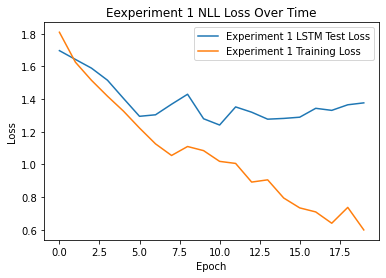

In [19]:
print(len(test_losses))
counter = list(range(20))
print(counter)

from matplotlib import pyplot as plt

y = train_losses[0:-1:6]
print(len(y))
plt.plot(counter, test_losses, label='Experiment 1 LSTM Test Loss')
plt.plot(counter, y, label='Experiment 1 Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Eexperiment 1 NLL Loss Over Time')
plt.legend()


20
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
20


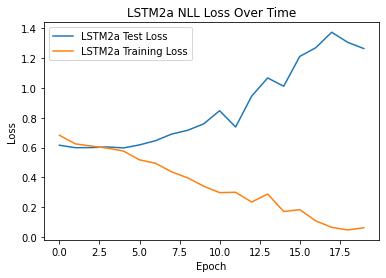

In [ ]:
print(len(test_losses))
counter = list(range(20))
print(counter)

from matplotlib import pyplot as plt

y = train_losses[0:-1:5]
print(len(y))
plt.plot(counter, test_losses, label='LSTM2a Test Loss')
plt.plot(counter, y, label='LSTM2a Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('LSTM2a NLL Loss Over Time')
plt.legend()




torch.Size([300, 1290, 14])
1


<function matplotlib.pyplot.show>

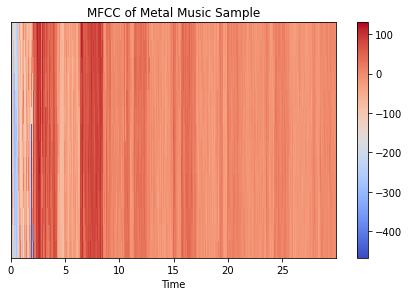

In [ ]:
plt.close()
print(exp3_inputs_test.shape)
from matplotlib import cm
fig, ax = plt.subplots()
ar = exp3_inputs_test[20].transpose(1,0)
print(exp3_labels_test[20].item())
plt.close()
import librosa.display
librosa.display.specshow(ar.detach().numpy(), x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.title('MFCC of Metal Music Sample')
plt.show

torch.Size([300, 1290, 14])
6


<function matplotlib.pyplot.show>

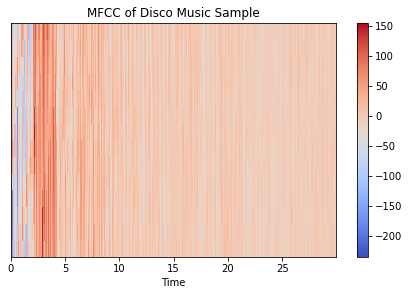

In [ ]:
plt.close()
print(exp3_inputs_test.shape)
from matplotlib import cm
fig, ax = plt.subplots()
ar = exp3_inputs_test[34].transpose(1,0)
print(exp3_labels_test[34].item())
plt.close()
import librosa.display
librosa.display.specshow(ar.detach().numpy(), x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.title('MFCC of Disco Music Sample')
plt.show